<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Overview</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Summarize" data-toc-modified-id="Summarize-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Summarize</a></span></li><li><span><a href="#Simple-Models" data-toc-modified-id="Simple-Models-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simple Models</a></span></li></ul></li><li><span><a href="#Soft-PLS-DA-(Discrimination)-Model" data-toc-modified-id="Soft-PLS-DA-(Discrimination)-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Soft PLS-DA (Discrimination) Model</a></span><ul class="toc-item"><li><span><a href="#Optimize-model" data-toc-modified-id="Optimize-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Optimize model</a></span></li><li><span><a href="#SHAP-Explanations" data-toc-modified-id="SHAP-Explanations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SHAP Explanations</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-GAU-error-in-the-Training-Set" data-toc-modified-id="Look-at-the-GAU-error-in-the-Training-Set-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Look at the GAU error in the Training Set</a></span></li><li><span><a href="#Look-at-the-GAU-errors-in-the-Test-Set" data-toc-modified-id="Look-at-the-GAU-errors-in-the-Test-Set-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Look at the GAU errors in the Test Set</a></span></li></ul></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#DD-SIMCA-Authentication-Models" data-toc-modified-id="DD-SIMCA-Authentication-Models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DD-SIMCA Authentication Models</a></span><ul class="toc-item"><li><span><a href="#Optimize-models" data-toc-modified-id="Optimize-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Optimize models</a></span></li><li><span><a href="#SHAP-Explanations" data-toc-modified-id="SHAP-Explanations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SHAP Explanations</a></span><ul class="toc-item"><li><span><a href="#Look-at-the-GAU-errors-on-the-Test-Set" data-toc-modified-id="Look-at-the-GAU-errors-on-the-Test-Set-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Look at the GAU errors on the Test Set</a></span></li></ul></li><li><span><a href="#Diagnostics" data-toc-modified-id="Diagnostics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Diagnostics</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#EllipticManifold-Authentication-Models" data-toc-modified-id="EllipticManifold-Authentication-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EllipticManifold Authentication Models</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [1]:
using_colab = 'google.colab' in str(get_ipython())
if using_colab:
    !git clone https://github.com/mahynski/pychemauth.git
    !cd pychemauth; pip3 install -r requirements.txt
else:
    import sys
    sys.path.append('../../../')

import pychemauth

import matplotlib.pyplot as plt
%matplotlib notebook

import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

In [2]:
import sklearn
import imblearn
import shap
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from pychemauth.utils import plot_learning_curve

shap.initjs()

Overview
--------
This notebook analyzes stable stable isotope and trace element (SITE) data collected from beef samples to assess their provenance.

In [3]:
%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

sys       : 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
shap      : 0.40.0
matplotlib: 3.5.1
numpy     : 1.21.5
seaborn   : 0.11.2
watermark : 2.3.0
pandas    : 1.3.4
imblearn  : 0.9.0
sklearn   : 1.0.2



# Exploratory Data Analysis

## Load Data

In [4]:
# This data comes from the IAEA and is hosted by NIST

In [5]:
# # 1. Query Website
# df = pd.read_csv('https://www.nist.gov/path/to/database/beef.csv')
#        .drop(['ID','NR','RegionNo','LabNo','Date'], axis=1)
#        .groupby(['TraceSampleCode', 'Region'])
#        .reset_index('Region')

# # 2. Some basic preprocessing (Only use data with all available measurements)
# data = df.dropna() 

# # 3. Extract X and y matrices
# X = data[[x for x in data.columns if x != 'Region']].values
# y = data['Region'].values

# Dropping IRE because not enough data to sustain CV
# Note that SIC also is likely to have problems

# mask = np.array([a != 'IRE' for a in y])
# X = X[mask]
# y = y[mask]

# # 4. Initial train/test split
# X_train, X_test, y_train, y_test = sklearn
#                                     .model_selection
#                                     .train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [6]:
from pathlib import Path

def get_parsed_data(path, drop_cols):
    df = pd.read_csv(path)
    drop = [x for x in df.columns if x in drop_cols]
    return (
        df
        .drop(drop, axis=1)
        .groupby(['TraceSampleCode', 'Region'])
        .mean()
    )

df = pd.concat((
    get_parsed_data(path, drop_cols=['ID','NR','RegionNo','LabNo','Date','1SD_Sr87Bulk'])
    for path in Path('./data/').glob('tbl_Beef*.csv') if 'Field' not in path.name), 
    axis=1,
    sort=True, 
    copy=True, 
    verify_integrity='True',
    join='outer').reset_index('Region')

data = df.dropna() # Only use data with all available measurements

analytes = [x for x in data.columns if x != 'Region']
X = data[analytes].values
y = data['Region'].values

# Dropping IRE because not enough data to sustain CV
# Note that SIC also is likely to have problems

mask = np.array([a != 'IRE' for a in y])
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [7]:
use_data = pd.DataFrame(data=np.hstack((y.reshape(-1,1), X)), columns=['Region']+analytes)

## Summarize

In [8]:
use_data.head()

,Region,Sr87_Bulk,d13C,d15N,d2H,d34S,Li_Bulk,B_Bulk,Na_Bulk,Mg_Bulk,...,La_Bulk,Ce_Bulk,Nd_Bulk,Sm_Bulk,Eu_Bulk,Yb_Bulk,Lu_Bulk,Tl_Bulk,Pb_Bulk,U_Bulk
0,GAU,0.711221,-25.7,7.1,-104.0,4.8,-0.030226,0.373692,2866.634968,943.280924,...,-0.000535,0.000547,-0.000378,0.000526,-0.00023,-0.000219,-0.000276,0.000479,0.001694,-0.000112
1,GAU,0.708529,-22.1,6.4,-106.0,4.6,0.01598,0.741734,1796.511233,834.749729,...,-0.000423,-0.000607,-0.000742,-0.000348,-0.000257,-0.000273,-0.000107,0.001052,0.001526,-0.000248
2,GAU,0.710618,-26.3,7.0,-105.0,5.1,0.008356,0.461299,2536.032136,815.618552,...,0.000431,0.000801,-0.000742,-0.000348,-0.000257,-0.000273,-0.000107,0.000768,0.016857,-0.000248
3,GAU,0.709822,-15.5,6.1,-103.0,5.3,0.00762,0.298017,2090.759033,872.885848,...,-0.000423,-0.000607,-0.000742,-0.000348,-0.000257,-0.000273,0.000118,0.000764,0.008217,0.000263
4,GAU,0.70914,-17.2,7.2,-104.0,6.6,0.017054,0.183888,2233.828957,795.295603,...,-0.000423,-0.000607,0.000831,-0.000348,-0.000257,-0.000273,-0.000107,-0.000281,0.003671,-0.000248


<IPython.core.display.Javascript object>


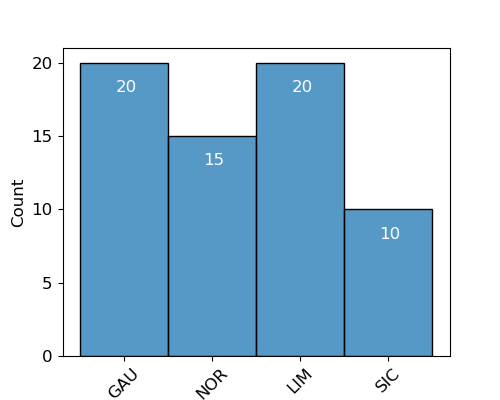

In [9]:
plt.figure(figsize=(5,4))
sns.histplot(use_data, x='Region') # IRE was discarded above because not enough samples to sustain CV
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks([0, 5, 10, 15, 20], fontsize=12)
plt.ylabel('Count', fontsize=12)

for i,reg in enumerate(use_data.Region.unique()):
    plt.text(i-0.1, np.sum(use_data['Region'] == reg)-2, 
             str(np.sum(use_data['Region'] == reg)), fontsize=12, color='white')


In [10]:
%matplotlib inline

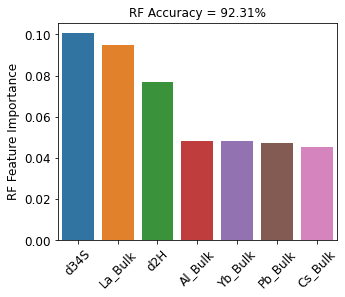

In [11]:
def random_forest_importances(X, y, columns, test_size=0.2, n_estimators=100, ax=None):
    """
    Preliminary estimate of feature importance based on random forests.
    
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=feature%20importance#sklearn.ensemble.RandomForestClassifier.feature_importances_
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y)

    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    forest.fit(X_train, y_train) # Tree-based classifiers do not need scaling/normalization

    importances = sorted(list(zip(columns, forest.feature_importances_)), key=lambda x:x[1], reverse=True)[:7] # Just the top few

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(5,4))
        importance_df = pd.DataFrame(
            columns=['Element', 'Importance'],
            data=importances,
        )
        plt.xticks(rotation=45)
        _ = sns.barplot(data=importance_df, x='Element', y='Importance', ax=ax, orient='v')

    ax.set_xlabel('')
    ax.set_ylabel('RF Feature Importance', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    score = forest.score(X_test, y_test)
    ax.set_title('RF Accuracy = {}%'.format('%.2f'%(100*score)), fontsize=12)
    
    return importances, forest

analytes = [x for x in use_data.columns if x != 'Region']
importances, forest = random_forest_importances(
    use_data[analytes].values,
    use_data['Region'].values, 
    columns=analytes,
    test_size=0.2, 
    n_estimators=100
)

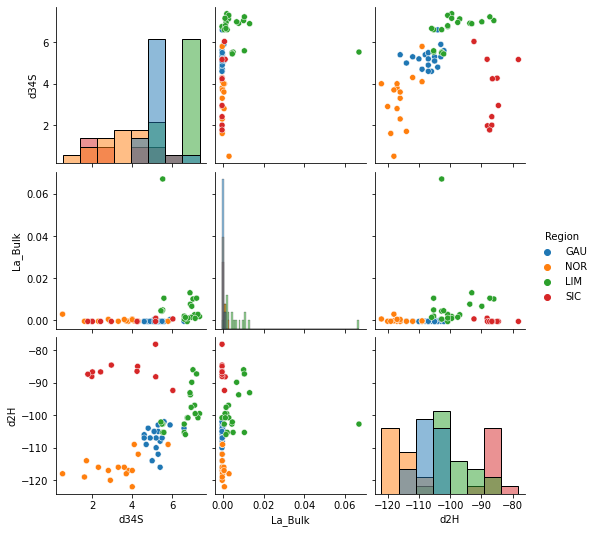

In [12]:
# Pairwise, these features show some separation/clustering suggesting that classification is likely to 
# be successful.
sns.pairplot(use_data, 
             vars=[x_[0] for x_ in importances[:3]],
             diag_kind='hist', 
             hue='Region')

## Simple Models

Text(0.5, 1.0, 'LDA')

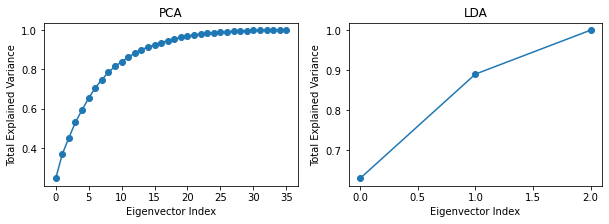

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA as PCA
from sklearn.preprocessing import StandardScaler

lda = LDA(solver='svd', shrinkage=None, n_components=3)
pca = PCA(whiten=False, random_state=0)

ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)

lda.fit(X_scaled, y_train)
pca.fit(X_scaled, y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax = axes.flatten()

ax[0].plot(np.cumsum(pca.explained_variance_ratio_), '-o')
ax[0].set_ylabel('Total Explained Variance')
ax[0].set_xlabel('Eigenvector Index')
ax[0].set_title('PCA')

ax[1].plot(np.cumsum(lda.explained_variance_ratio_), '-o')
ax[1].set_ylabel('Total Explained Variance')
ax[1].set_xlabel('Eigenvector Index')
ax[1].set_title('LDA')

In [14]:
%matplotlib notebook

In [15]:
# LDA (supervised) separates well in a few dimensions, PCA (unsupervised) does not

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

X_new_lda = lda.transform(X_scaled)
X_new_pca = pca.transform(X_scaled)

ax = fig.add_subplot(121, projection='3d')
ax.set_title('LDA (Supervised)')
for loc in np.unique(y_train):
    x_ = X_new_lda[y_train == loc,:]
    ax.scatter(x_[:,0], x_[:,1], x_[:,2], label=loc)
plt.legend(loc='best')
ax.set_xlabel('PC {} ({}%)'.format(1, '%.2f'%(100*lda.explained_variance_ratio_[0]) ))
ax.set_ylabel('PC {} ({}%)'.format(2, '%.2f'%(100*lda.explained_variance_ratio_[1]) ))
ax.set_zlabel('PC {} ({}%)'.format(3, '%.2f'%(100*lda.explained_variance_ratio_[2]) ))

ax = fig.add_subplot(122, projection='3d')
ax.set_title('PCA (Unsupervised)')
for loc in np.unique(y_train):
    x_ = X_new_pca[y_train == loc,:]
    ax.scatter(x_[:,0], x_[:,1], x_[:,2], label=loc)
plt.legend(loc='best')
ax.set_xlabel('PC {} ({}%)'.format(1, '%.2f'%(100*pca.explained_variance_ratio_[0]) ))
ax.set_ylabel('PC {} ({}%)'.format(2, '%.2f'%(100*pca.explained_variance_ratio_[1]) ))
ax.set_zlabel('PC {} ({}%)'.format(3, '%.2f'%(100*pca.explained_variance_ratio_[2]) ))


<IPython.core.display.Javascript object>

Text(0.5, 0, 'PC 3 (8.28%)')

In [16]:
# LDA looks good, but the goal is to build an authentication model not a discrimination model

# Soft PLS-DA (Discrimination) Model

In [17]:
from pychemauth.classifier.plsda import PLSDA

## Optimize model

In [49]:
# Let's optimize a PLS-DA model based on its total efficiency (TEFF). Data scaling is handled
# internally via the scale_x hyperparameter so we don't need additional step initially, unless
# you want to add this for some reason.

pipeline = imblearn.pipeline.Pipeline(steps=[
    # Insert other preprocessing steps here...
    # ("smote", ScaledSMOTEENN(random_state=1)), # For example, class balancing
    ("plsda", PLSDA(n_components=3, 
                    alpha=0.05,
                    gamma=0.01,
                    scale_x=True, 
                    not_assigned='UNKNOWN',
                    style='soft', 
                    score_metric='TEFF'
                   )
    )
])

# Hyperparameters of pipeline steps are given in standard notation: step__parameter_name
param_grid = [{
    # 'smote__k_enn':[1, 2, 3],
    # 'smote__k_smote':[1, 3, 3],
    # 'smote__kind_sel_enn':['all', 'mode'],
    'plsda__n_components':np.arange(1, 20, 2),
    'plsda__alpha': [0.05],#, 0.01], # Try a few alpha values to see
    'plsda__scale_x': [True], # SITE data makes sense to standardize
}]

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=sklearn.model_selection.StratifiedKFold(
        n_splits=5, 
        shuffle=True, 
        random_state=0,
    ),
    error_score=0,
    refit=True
)

_ = gs.fit(X_train, y_train)


5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "../../..\pychemauth\classifier\plsda.py", line 325, in fit
    np.linalg.cholesky(self.__S_[i])
  File "<__array_function__ internals>", line 6, in cholesky
  File "C:\Users\nam4\Anaconda3\envs\py37\lib\site-packages\numpy\linalg\linalg.py", line 763, in cholesky
    r = gufunc(a, signature=signature, extobj=extobj)
  File "C:\Users\nam4\Anaconda3\envs\py37\lib\site-packages\numpy\linalg\linalg.py", line 91, in _raise_linalgerror_nonposdef
    raise LinAlgError("Matrix is not positive definite")
numpy.linalg.LinAlgError: Matrix is not positive definite

During handling of th

In [50]:
gs.best_params_

{'plsda__alpha': 0.05, 'plsda__n_components': 5, 'plsda__scale_x': True}

In [51]:
pred = gs.predict(X_test)
df, I, CSNS, CSPS, CEFF, TSNS, TSPS, TEFF = gs.best_estimator_.named_steps['plsda'].figures_of_merit(pred, y_test)

In [52]:
df # Look at the predictions (akin to confusion matrix)

,GAU,LIM,NOR,SIC,UNKNOWN
GAU,3,0,0,0,1
LIM,0,3,0,0,1
NOR,0,0,2,0,1
SIC,0,0,0,2,0


In [53]:
# Were their any outliers detected at the given gamma=0.01? 
np.any(gs.best_estimator_.named_steps['plsda'].check_outliers())
# No! So no need to iteratively "clean" the dataset as in, e.g., Rodionova OY., Pomerantsev AL. 
# "Detection of Outliers in Projection-Based Modeling", Anal. Chem. 2020, 92, 2656−2664.

False

In [54]:
print('Best PLSDA model has SCORE (train) = {}, SCORE (test) = {}'.format(
    '%.4f'%gs.score(X_train, y_train),
    '%.4f'%gs.score(X_test, y_test))
)

Best PLSDA model has SCORE (train) = 0.9903, SCORE (test) = 0.8771


In [55]:
# Just like LDA, the discriminant model is very good - this is a "soft" PLS-DA so closer to authentication
# model, but not exactly.

<IPython.core.display.Javascript object>


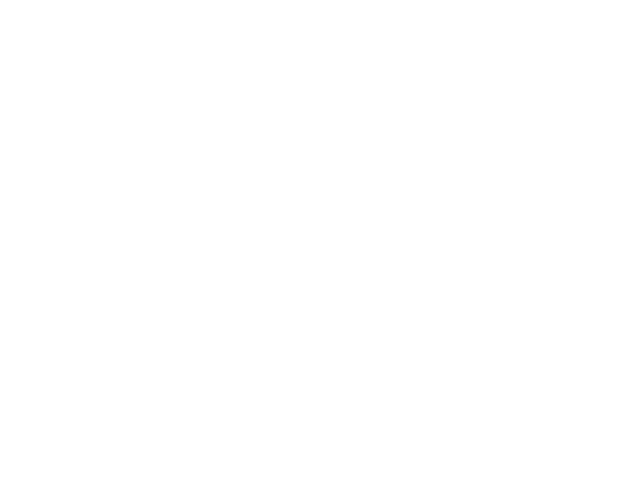

In [76]:
# Let's visualize the results
fig = plt.figure()
for i, (x_, y_, title) in enumerate(zip( (X_train, X_test), (y_train, y_test), ('Training Set', 'Test Set') )):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    for j, class_ in enumerate(np.unique(y_)):
        mask = y_ == class_
        
        correct = np.array([a==b for a,b in zip([[a] for a in y_[mask].tolist()], gs.predict(x_[mask]))])
        
        X_proj = gs.transform(x_[mask])
        if np.sum(correct > 0):
            ax.scatter(X_proj[correct,0], X_proj[correct,1], X_proj[correct,2], 
                       label='Correct '+class_, color='C{}'.format(j), marker='o', alpha=0.25)
        if np.sum(~correct > 0):
            ax.scatter(X_proj[~correct,0], X_proj[~correct,1], X_proj[~correct,2], 
                       label='Incorrect '+class_, color='C{}'.format(j), marker='*')

    ax.set_xlabel('sPC 1')
    ax.set_ylabel('sPC 2')
    ax.set_zlabel('sPC 3')
    ax.legend(loc='best')
    ax.set_title(title)

## SHAP Explanations

In [64]:
explainer = shap.KernelExplainer(
    model = gs.predict_proba, 
    data = X_train, #shap.sample(X_train, 30, random_state=0), # vs. data = X_train to use full training set
)

In [65]:
explainer.expected_value

array([0.26656312, 0.26054574, 0.21978212, 0.13339176])

In [66]:
gs.best_estimator_.named_steps['plsda'].categories

array(['GAU', 'LIM', 'NOR', 'SIC'], dtype=object)

In [67]:
shap_values_train = explainer.shap_values(X_train, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_train.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )

  0%|          | 0/52 [00:00<?, ?it/s]

In [80]:
shap_values_test = explainer.shap_values(X_test, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_test.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )

  0%|          | 0/13 [00:00<?, ?it/s]

In [71]:
fig = plt.figure(figsize=(10,6))

for chosen_class in [0, 1, 2, 3]:
    ax = fig.add_subplot(2, 2, chosen_class+1)
    ax.set_title(gs.best_estimator_.named_steps['plsda'].categories[chosen_class])
    sv = shap_values_train[chosen_class]

    shap.summary_plot(
        shap_values=sv,
        features=X_train,
        feature_names=analytes,
        plot_type='violin',
        max_display=7
    )
plt.tight_layout()

<IPython.core.display.Javascript object>

In [68]:
# fig = plt.figure(figsize=(10,6))

# for chosen_class in [0, 1, 2, 3]:
#     ax = fig.add_subplot(2, 2, chosen_class+1)
#     ax.set_title(gs.best_estimator_.named_steps['plsda'].categories[chosen_class])
#     sv = shap_values_test[chosen_class]

#     shap.summary_plot(
#         shap_values=sv,
#         features=X_test,
#         feature_names=analytes,
#         plot_type='violin',
#         max_display=5
#     )
# plt.tight_layout()

### Look at the LIM error in the Training Set

In [104]:
chosen_class = 1 # LIM = class 0

In [105]:
# The reason it was incorrectly predicted was because it was determined to be BOTH GAU and LIM
# Since predict() orders by lowest Mahalanobis distance, this suggests LIM is more likely, but
# GAU was still predicted.

y_ = y_train
mask = y_ == gs.best_estimator_.named_steps['plsda'].categories[chosen_class]
x_ = X_train
incorrect = ~np.array([a==b for a,b in zip([[a] for a in y_[mask].tolist()], gs.predict(x_[mask]))])

np.array(gs.predict(X_train), dtype=object)[mask][incorrect]

array([['UNKNOWN']], dtype=object)

In [118]:
# Of all the LIM predictions, the one with the lowest LIM probability is the one we predicted incorrectly.
# Moreover, it was STILL predicted to be LIM, just also another class.  This is just due to "overlap"
# of the decision boundaries, and doesn't seem to suggest (to me) that anything is particularly bad.
plt.figure()
plt.title('Prob(LIM | LIM) Training Set')
shap.decision_plot(
    explainer.expected_value[chosen_class], 
    shap_values_train[chosen_class][mask], 
    feature_names=analytes,
    highlight=incorrect,
    feature_display_range=slice(-1, -37, -1)
)

<IPython.core.display.Javascript object>

In [119]:
shap.force_plot(
    base_value=explainer.expected_value[chosen_class],
    shap_values=shap_values_train[chosen_class][mask][incorrect], 
    features=X_train[mask][incorrect],
    feature_names=analytes
)

In [111]:
plt.figure()
plt.title('Prob(GAU | LIM)')
shap.decision_plot(
    explainer.expected_value[0], 
    shap_values_train[0][mask], 
    feature_names=analytes,
    highlight=incorrect,
)

<IPython.core.display.Javascript object>

In [113]:
# GAU is class 0
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_train[0][mask][incorrect], 
    features=X_train[mask][incorrect],
    feature_names=analytes
)

In [114]:
# Probs directly from SHAP ...
np.sum(shap_values_train[1][mask], axis=1) + explainer.expected_value[1]

array([0.89603028, 0.68349935, 0.75322785, 0.62712443, 0.77979604,
       0.71463594, 0.84090138, 0.68220663, 0.78819544, 0.78509453,
       0.8617798 , 0.74964077, 0.46085428, 0.84704322, 0.63094921,
       0.86037976])

In [115]:
# are the same as directly from the model
probs = gs.predict_proba(X_train)[mask,1]
probs

array([0.89603028, 0.68349935, 0.75322785, 0.62712443, 0.77979604,
       0.71463594, 0.84090138, 0.68220663, 0.78819544, 0.78509453,
       0.8617798 , 0.74964077, 0.46085428, 0.84704322, 0.63094921,
       0.86037976])

In [84]:
# Nothing incredibly obvious above, but perhaps there is some correlation in other (meta)data or how it was 
# collected, so you can go back and check into that.

### Look at the GAU errors in the Test Set

In [81]:
chosen_class = 0 # GAU = class 0

In [82]:
# We have 2 incorrectly predicted examples from the Test set; one was 'unknown' the other was, again,
# a combination between GAU and LIM, although this time GAU was considered the most likely

y_ = y_test
mask = y_ == gs.best_estimator_.named_steps['plsda'].categories[chosen_class]
x_ = X_test
incorrect = ~np.array([a==b for a,b in zip([[a] for a in y_[mask].tolist()], gs.predict(x_[mask]))])

np.array(gs.predict(X_test), dtype=object)[mask][incorrect]

array([['UNKNOWN']], dtype=object)

In [92]:
# Of all the GAU predictions, the one with the lowest GAU probability is the one we predicted incorrectly.
# Moreover, it was STILL predicted to be GAU, just also another class.  This is just due to "overlap"
# of the decision boundaries, and doesn't seem to suggest (to me) that anything is particularly bad.
plt.figure()
plt.title('Prob(GAU | GAU) Test Set')
shap.decision_plot(
    explainer.expected_value[chosen_class], 
    shap_values_test[chosen_class][mask], 
    feature_names=analytes,
    highlight=incorrect,
    feature_display_range=slice(-1, -37, -1)
)

# The highest probability is the one predicted to be GAU (and also LIM);
# the other "unknown" is just barely below the threshold for a correct GAU prediction.
# This suggests the model is behaving well, it could just use a little more "fine tuning"

<IPython.core.display.Javascript object>

In [97]:
# More good news!  The "unknown" sample has P(LIM) --> 0 so it is not confused by (at least the LIM category)
# this.  Moreover, the P(LIM) for the sample predicted as both LIM and GAU is just barely over the 50% mark;
# so it is predicted to be LIM even though it is GAU, but only just.  Again, this means a little tuning
# could fix this!

# Note: It is clear from the decision path that B_Bulk to Zn_Bulk are contributing to this error most
# significantly.

plt.figure()
plt.title('Prob(LIM | GAU)')
shap.decision_plot(
    explainer.expected_value[1], 
    shap_values_test[1][mask], 
    feature_names=analytes,
    highlight=incorrect,
    feature_display_range=slice(-1, -37, -1)
)

<IPython.core.display.Javascript object>

## Diagnostics

In [120]:
# Let's look at a learning curve to see if more data would improve the model further

In [121]:
# Let's just take the optimal model we found earlier
model = PLSDA(n_components=5, 
                    alpha=0.05,
                    gamma=0.01,
                    scale_x=True, 
                    not_assigned='UNKNOWN',
                    style='soft', 
                    score_metric='TEFF'
                   )

# Normally we would just use the X_train and y_train, but because data is so scarce we cannot sustain
# a reasonable number of CV splits - here we will resample (sample with replacement) but you could 
# consider more advanced minority class resampling algorithms (e.g., SMOTE). 
from sklearn.utils import resample
X_r, y_r = resample(X, y, n_samples=X.shape[0]*4, stratify=y, random_state=0)

plot_learning_curve(model=model, X=X_r, y=y_r, cv=5, train_sizes=np.linspace(0.5, 1.0, 10))

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Number of training samples'>

In [91]:
# The two curves are nearly converged.  This suggests the model will not 
# be greatly improved by more data, but this was performed using resampling.

## Summary

* A PLS-DA model is a discrimination model, even if it is "soft"
* It has a very good performance (total efficiency) at distinguishing between the 4 classes of Beef provided
* Errors seem to be due to "edge" effects which can be improved by a little better tuning, but no obvious errors seem present
* A learning curve suggests we don't really need more data to improve this model

# DD-SIMCA Authentication Models

In [122]:
from pychemauth.classifier.simca import SIMCA_Classifier

In [123]:
# The previous example of PLS-DA trains a single model to distinguish between all known classes, and possibly
# the unknown. An authentication model trains on a single class and uses the others (if provided) as 
# background to check the model's efficiency, but is not used during training.

# This is going to use TEFF (compliant not rigorous) so this is not a perfect "authentication" model but it is 
# good for demonstration purposes.

In [186]:
np.unique(y_train)

array(['GAU', 'LIM', 'NOR', 'SIC'], dtype=object)

In [306]:
targets = sorted(np.unique(y_train))

## Optimize models

In [307]:
import sys
sys.path.append('../../../')
import ml_utils
from ml_utils.sklearn_ext.imbalanced import ScaledSMOTEENN
from pychemauth.preprocessing.scaling import CorrectedScaler

In [398]:
# It turns out SIC has some columns wiht no variance, so standardization explodes (divide by 0)
# Let's just remove those columns. 

# This was not a problem before, because standardization (if performed) was done over all categories, not just one
# by one.
no_var = np.where(np.std(X_train[y_train=='SIC'], axis=0) < 1.0e-12)[0]
print(np.array(analytes)[no_var])

mask = np.array([True]*X_train.shape[1])
mask[no_var] = False
X_trim_train = X_train[:,mask]
X_trim_test = X_test[:,mask]
trimmed_analytes = np.array(analytes)[mask]

['Nd_Bulk' 'Eu_Bulk' 'Lu_Bulk']


In [399]:
# There are still some other errors because some SIC values are almost all the
# same, but have an occasional different value, e.g., [a, a, a, b, a]; if that different value is held out in the 
# test fold of the CV you get a std~0 on the training folds.

# These were discovered manually
X_trim_train[y_train=='SIC',29]

array([ 0.00014701, -0.00011274, -0.00011274, -0.00011274, -0.00011274,
       -0.00011274, -0.00011274, -0.00011274])

In [400]:
X_trim_train[y_train=='SIC',6]

array([-0.49910078,  0.69880432, -0.49910078, -0.49910078, -0.49910078,
       -0.49910078, -0.49910078, -0.49910078])

In [401]:
mask = np.array([True]*X_trim_train.shape[1])
mask[6] = False
mask[29] = False

X_trim_train = X_trim_train[:,mask]
X_trim_test = X_trim_test[:,mask]
trimmed_analytes = trimmed_analytes[mask]

In [386]:
# Now let's optimize a SIMCA model based on its total efficiency (TEFF). Data scaling is handled
# internally via the scale_x hyperparameter so we don't need additional step initially, unless
# you want to add this for some reason.

models = {}

for target in targets:
    pipeline = imblearn.pipeline.Pipeline(steps=[
        # Insert other preprocessing steps here...
#         ("smote", ScaledSMOTEENN(random_state=1)), # For example, class balancing
        ("simca", SIMCA_Classifier(n_components=7, 
                                   alpha=0.05, 
                                   scale_x=True, 
                                   style='dd-simca', 
                                   target_class=target, 
                                   use='TEFF')
        )
    ])

    # Hyperparameters of pipeline steps are given in standard notation: step__parameter_name
    param_grid = [{
#         'smote__k_enn':[1, 2, 3],
#         'smote__k_smote':[1, 3, 3],
#         'smote__kind_sel_enn':['all', 'mode'],
        'simca__n_components':np.arange(1, 3), #10),
        'simca__alpha':[0.05], #, 0.01],
        'simca__style':['dd-simca'],
        'simca__scale_x':[True]
    }]

    gs = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        n_jobs=-1,
        cv=sklearn.model_selection.StratifiedKFold(
            n_splits=5, 
            shuffle=True, 
            random_state=0
        ),
        error_score=0,
        refit=True
    )

    _ = gs.fit(X_trim_train, y_train)
    
    models[target] = gs
    
    print(target, gs.best_params_)

GAU {'simca__alpha': 0.05, 'simca__n_components': 2, 'simca__scale_x': True, 'simca__style': 'dd-simca'}
LIM {'simca__alpha': 0.05, 'simca__n_components': 2, 'simca__scale_x': True, 'simca__style': 'dd-simca'}
NOR {'simca__alpha': 0.05, 'simca__n_components': 1, 'simca__scale_x': True, 'simca__style': 'dd-simca'}
SIC {'simca__alpha': 0.05, 'simca__n_components': 1, 'simca__scale_x': True, 'simca__style': 'dd-simca'}


In [415]:
for target in models:
    print('Best SIMCA model for {} has TEFF (train) = {}, TEFF (test) = {}'.format(
        target,
        '%.4f'%models[target].score(X_trim_train, y_train),
        '%.4f'%models[target].score(X_trim_test, y_test))
    )

Best SIMCA model for GAU has TEFF (train) = 0.9354, TEFF (test) = 0.5000
Best SIMCA model for LIM has TEFF (train) = 0.9014, TEFF (test) = 1.0000
Best SIMCA model for NOR has TEFF (train) = 0.9129, TEFF (test) = 0.8165
Best SIMCA model for SIC has TEFF (train) = 0.9354, TEFF (test) = 0.7071


<IPython.core.display.Javascript object>


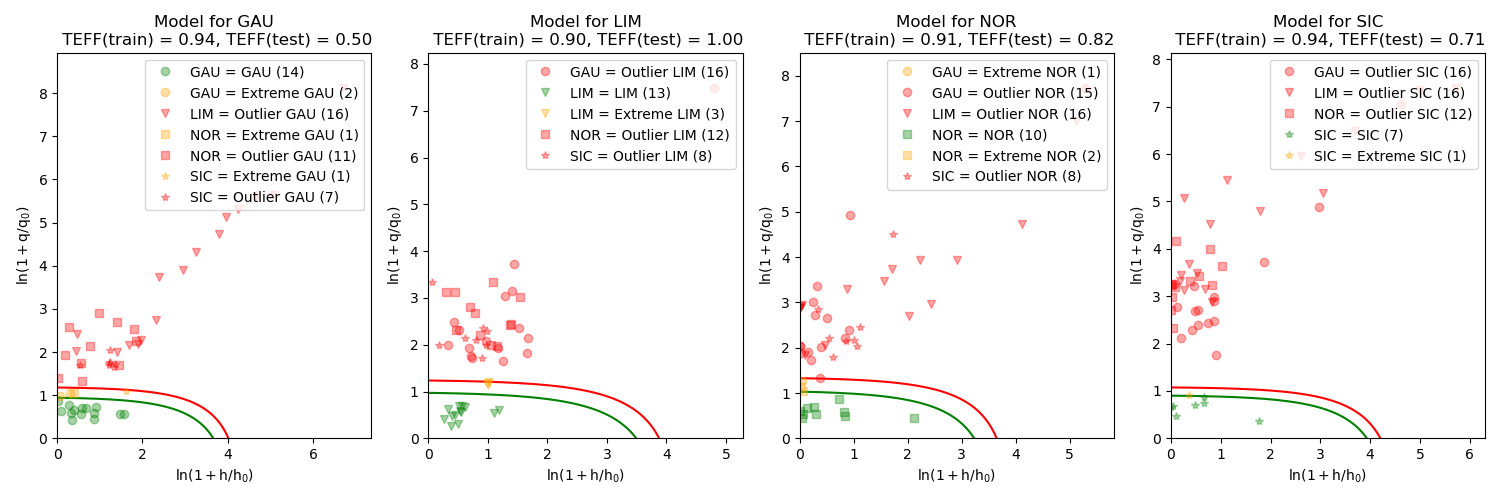

In [416]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
for ax, target in zip(axes.flatten(), models.keys()):
    models[target].best_estimator_.named_steps['simca'].model.visualize(X_trim_train, y_train, ax=ax)
    ax.set_title('Model for {}\n TEFF(train) = {}, TEFF(test) = {}'.format(target,
                                                                          '%.2f'%models[target].score(X_trim_train, y_train),
                                                                          '%.2f'%models[target].score(X_trim_test, y_test)
                                                                         ))
    ax.legend(loc=1)
    

plt.tight_layout()

In [311]:
# This is pretty good - alternative classes need to fall within the green boundary to be considered part of
# the class the authenticator was trained on; in all training cases, alternatives were classified as
# extremes or outliers. 

<IPython.core.display.Javascript object>


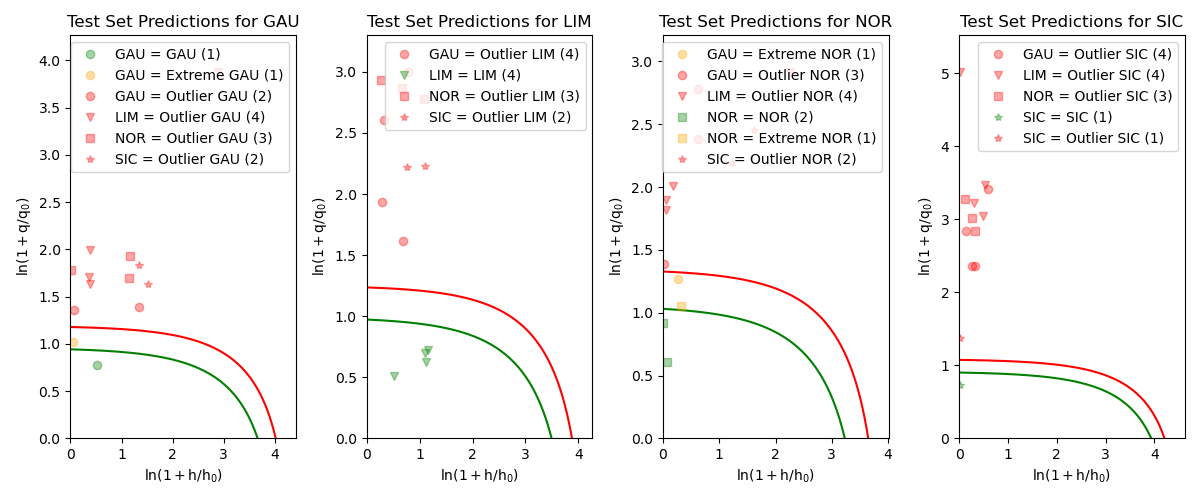

In [417]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,5))
for ax, target in zip(axes.flatten(), models.keys()):
    models[target].best_estimator_.named_steps['simca'].model.visualize(X_trim_test, y_test, ax=ax)
    ax.set_title('Test Set Predictions for {}'.format(target))
    ax.legend(loc=1)
plt.tight_layout()

## SHAP Explanations

In [392]:
# Let's focus on GAU as an example

In [394]:
shap_values_train = {}
shap_values_test = {}
explainer = {}

for target in targets:
    explain = shap.KernelExplainer(
        model = models[target].predict_proba, 
        data = X_trim_train, #shap.sample(X_train, 10, random_state=0), # vs. data = X_train to use full training set
    )
    
    explainer[target] = explain
    
    shap_values_train[target] = explain.shap_values(X_trim_train, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_trim_train.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )[0] # Just save inlier class results
    
    shap_values_test[target] = explain.shap_values(X_trim_test, 
                                    nsamples='auto', # Can increase for lower variance
                                    l1_reg='num_features({})'.format(
                                        np.min(
                                            [X_trim_test.shape[1], 20] # Only look at (up to) the top 20 features
                                        )
                                    )
                                   )[0] # Just save inlier class results

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


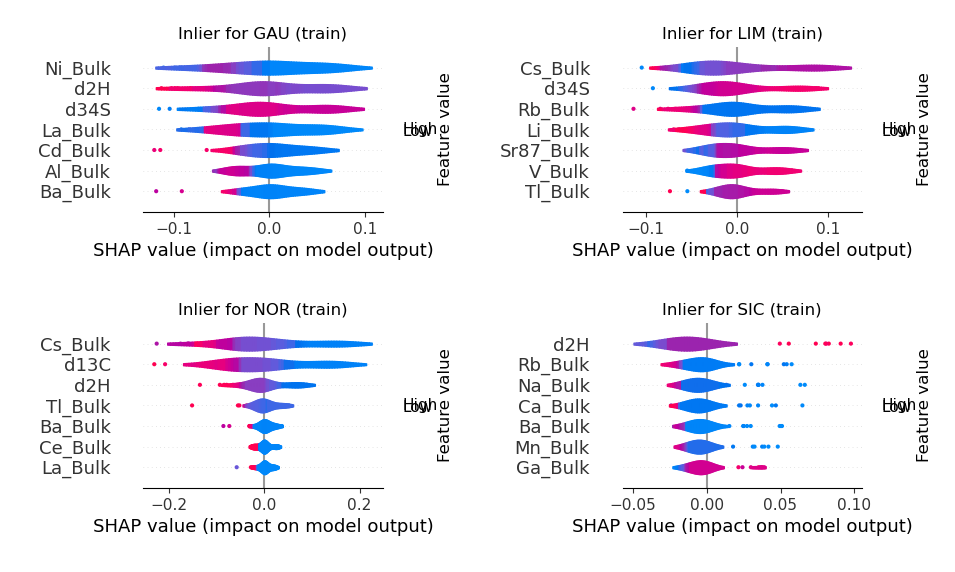

In [402]:
fig = plt.figure(figsize=(10,6))

for i,target in enumerate(targets):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title('Inlier for {} (train)'.format(target))
    sv = shap_values_train[target]

    shap.summary_plot(
        shap_values=sv,
        features=X_trim_train,
        feature_names=trimmed_analytes,
        plot_type='violin',
        max_display=7
    )
plt.tight_layout()

In [157]:
# NOR is almost completely decided on the basis of Cs_Bulk and d13C values (in training).

In [161]:
# fig = plt.figure(figsize=(10,6))

# for i,target in enumerate(targets):
#     ax = fig.add_subplot(2, 2, i+1)
#     ax.set_title('Inlier for {} (test)'.format(target))
#     sv = shap_values_test[target]

#     shap.summary_plot(
#         shap_values=sv,
#         features=X_test,
#         feature_names=analytes,
#         plot_type='violin',
#         max_display=7
#     )
# plt.tight_layout()

### Look at the GAU errors on the Test Set

In [403]:
mask = y_test == 'GAU'
incorrect = models['GAU'].predict(X_trim_test[mask]) == False

In [407]:
trimmed_analytes

array(['Sr87_Bulk', 'd13C', 'd15N', 'd2H', 'd34S', 'Li_Bulk', 'Na_Bulk',
       'Mg_Bulk', 'Al_Bulk', 'K_Bulk', 'Ca_Bulk', 'V_Bulk', 'Mn_Bulk',
       'Co_Bulk', 'Ni_Bulk', 'Cu_Bulk', 'Zn_Bulk', 'Ga_Bulk', 'Se_Bulk',
       'Rb_Bulk', 'Sr_Bulk', 'Mo_Bulk', 'Cd_Bulk', 'Cs_Bulk', 'Ba_Bulk',
       'La_Bulk', 'Ce_Bulk', 'Sm_Bulk', 'Tl_Bulk', 'Pb_Bulk', 'U_Bulk'],
      dtype='<U9')

<IPython.core.display.Javascript object>


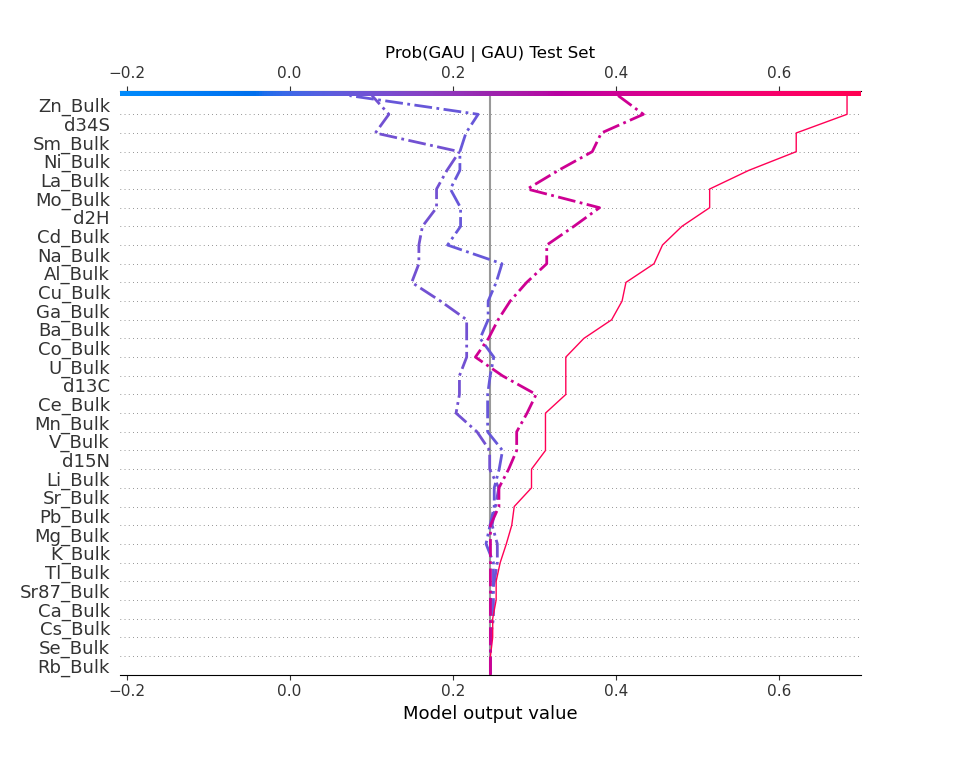

In [409]:
plt.figure()
plt.title('Prob(GAU | GAU) Test Set')
shap.decision_plot(
    explainer['GAU'].expected_value[0], 
    shap_values_test['GAU'][mask], 
    feature_names=trimmed_analytes.tolist(),
    highlight=incorrect,
    feature_display_range=slice(-1, -37, -1)
)

In [109]:
# The model is very confident that several examples, which ARE GAU, are NOT GAU.
# This suggests that there is a set of samples that do belong to GAU but which
# haven't been captured by the model. 

# Further investigation would be warranted.  Perhaps these all come from a single souce (farm, field, etc.)
# that has a unique terroir which appears different from other sources in the GAU class.  In that case, 
# there seems to be a sampling issue.  Or, the model is simply not powerful enough to describe all the variability
# in the training set.

## Diagnostics

In [410]:
# Normally we would just use the X_train and y_train, but because data is so scarce we cannot sustain
# a reasonable number of CV splits - here we will resample (sample with replacement) but you could 
# consider more advanced minority class resampling algorithms (e.g., SMOTE). 
from sklearn.utils import resample
X_r, y_r = resample(X_trim_train, y_train, n_samples=X.shape[0]*4, stratify=y_train, random_state=0)

<IPython.core.display.Javascript object>


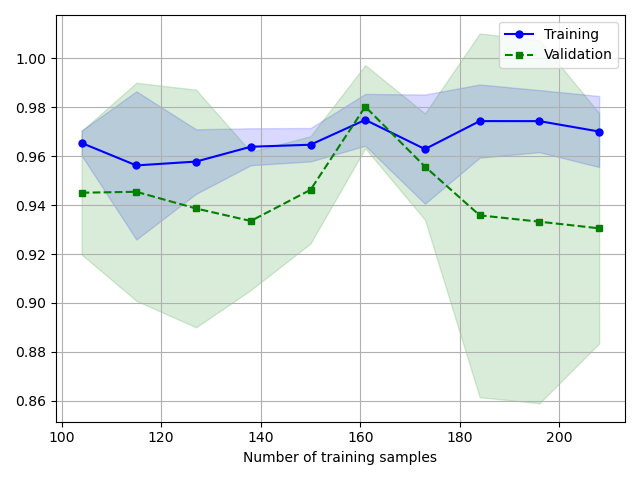

<AxesSubplot:xlabel='Number of training samples'>

In [412]:
# Let's just take the optimal model we found earlier
import copy
model = copy.deepcopy(models['GAU'])

# plt.figure()
plot_learning_curve(model=model, X=X_r, y=y_r, cv=5, train_sizes=np.linspace(0.5, 1.0, 10))

<IPython.core.display.Javascript object>


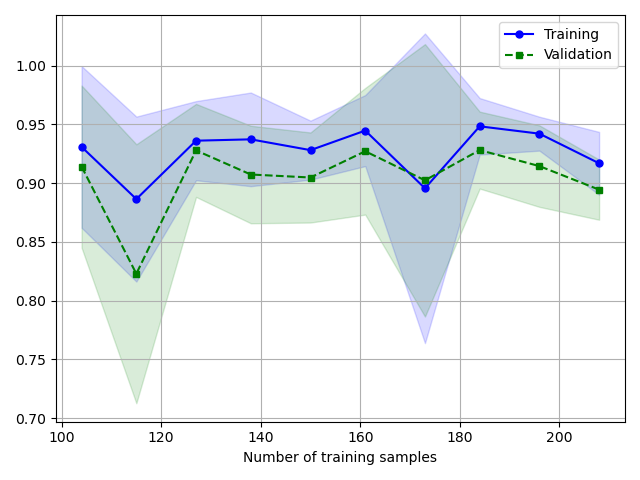

<AxesSubplot:xlabel='Number of training samples'>

In [413]:
# Let's just take the optimal model we found earlier
model = copy.deepcopy(models['LIM'])

# plt.figure()
plot_learning_curve(model=model, X=X_r, y=y_r, cv=5, train_sizes=np.linspace(0.5, 1.0, 10))

<IPython.core.display.Javascript object>


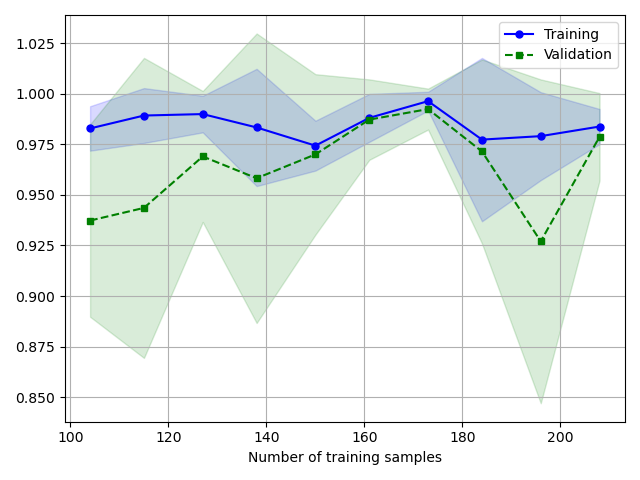

<AxesSubplot:xlabel='Number of training samples'>

In [414]:
# Let's just take the optimal model we found earlier
model = copy.deepcopy(models['NOR'])

# plt.figure()
plot_learning_curve(model=model, X=X_r, y=y_r, cv=5, train_sizes=np.linspace(0.5, 1.0, 10))

## Summary

* Many SIMCA models seem to perform well on test/train, but GAU and NOR have some serious issues which weren't found in the discrimination model.  Authentication often needs more data because it has to characterize the class based solely on the "positive" case; discrimination learns "differences" between specific classes which is usually easier and needs less data.
* LC suggests the GAU model doesn't need more data to IMPROVE upon WHAT IT ALREADY KNOWS ABOUT, but SHAP suggests that there is room to learn NEW things that could improve the TEFF even more.

# EllipticManifold Authentication Models

## Summary

<IPython.core.display.Javascript object>


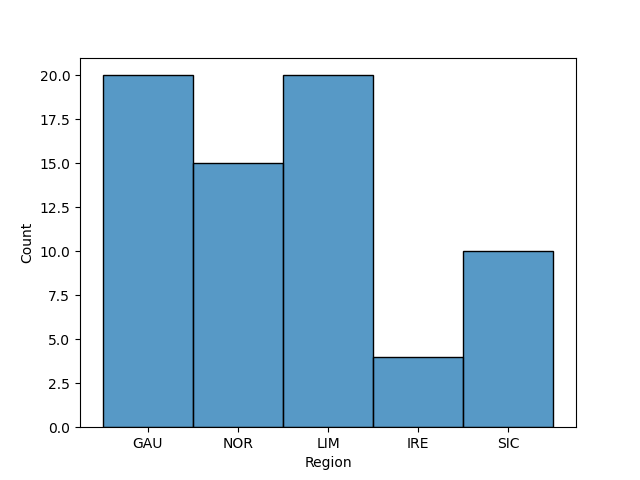

In [522]:
plt.figure()
_ = sns.histplot(data, x='Region')

* Manifold models need to use a reasonable number of neighbors (maybe 5-50, depending) to understand the topology of the data. However, we do not have enough data here to train these sorts of models (not even considering CV).
* This is why we consider "manifold learning" approaches to require a "medium to high" amount of data.